In [1]:
 #necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Define function to calculate EMI
def calculate_emi(principal, annual_rate, tenure_years):
    r = annual_rate / (12 * 100)  # Convert annual rate to monthly decimal
    n = tenure_years * 12         # Convert years to months
    emi = (principal * r * (1 + r) ** n) / ((1 + r) ** n - 1)
    return round(emi, 2)


In [6]:
#Generate amortization schedule
def generate_amortization_schedule(principal, annual_rate, tenure_years):
    r = annual_rate / (12 * 100)
    n = tenure_years * 12
    emi = calculate_emi(principal, annual_rate, tenure_years)

    balance = principal
    schedule = []

    for month in range(1, n + 1):
        interest = round(balance * r, 2)
        principal_payment = round(emi - interest, 2)
        balance = round(balance - principal_payment, 2)
        if balance < 0:
            balance = 0.0
        schedule.append([month, emi, principal_payment, interest, balance])

    df = pd.DataFrame(schedule, columns=['Month', 'EMI', 'Principal Paid', 'Interest Paid', 'Balance'])
    return df

In [15]:
#Take input and show EMI + Schedule
loan_amount = float(input("Enter loan amount (in ₹): "))
interest_rate = float(input("Enter annual interest rate (in %): "))
tenure_years = int(input("Enter loan tenure (in years): "))

# Calculate EMI
emi = calculate_emi(loan_amount, interest_rate, tenure_years)
print(f"\nYour Monthly EMI is: ₹{emi}\n")

# Generate schedule
schedule_df = generate_amortization_schedule(loan_amount, interest_rate, tenure_years)
print("Amortization Schedule (first 20 rows):\n")
print(schedule_df.head(20))  # Show first 10 months

Enter loan amount (in ₹):  1000000
Enter annual interest rate (in %):  7
Enter loan tenure (in years):  15



Your Monthly EMI is: ₹8988.28

Amortization Schedule (first 20 rows):

    Month      EMI  Principal Paid  Interest Paid    Balance
0       1  8988.28         3154.95        5833.33  996845.05
1       2  8988.28         3173.35        5814.93  993671.70
2       3  8988.28         3191.86        5796.42  990479.84
3       4  8988.28         3210.48        5777.80  987269.36
4       5  8988.28         3229.21        5759.07  984040.15
5       6  8988.28         3248.05        5740.23  980792.10
6       7  8988.28         3266.99        5721.29  977525.11
7       8  8988.28         3286.05        5702.23  974239.06
8       9  8988.28         3305.22        5683.06  970933.84
9      10  8988.28         3324.50        5663.78  967609.34
10     11  8988.28         3343.89        5644.39  964265.45
11     12  8988.28         3363.40        5624.88  960902.05
12     13  8988.28         3383.02        5605.26  957519.03
13     14  8988.28         3402.75        5585.53  954116.28
14     15  89

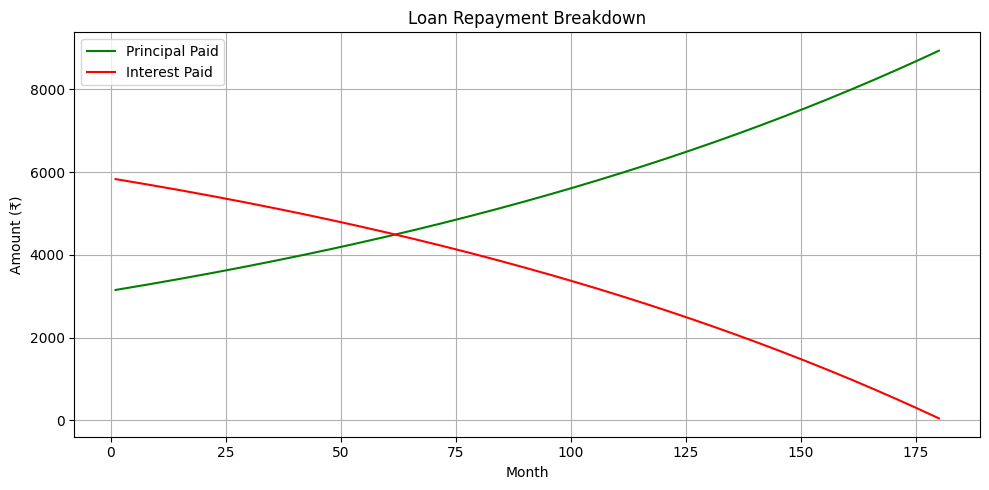

In [10]:
#Graph - Principal Paid vs Interest Paid
plt.figure(figsize=(10, 5))
plt.plot(schedule_df['Month'], schedule_df['Principal Paid'], label='Principal Paid', color='green')
plt.plot(schedule_df['Month'], schedule_df['Interest Paid'], label='Interest Paid', color='red')
plt.title("Loan Repayment Breakdown")
plt.xlabel("Month")
plt.ylabel("Amount (₹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
#Bonus summary
total_payment = round(schedule_df['EMI'].sum(), 2)
total_interest = round(schedule_df['Interest Paid'].sum(), 2)

print(f"\nTotal Payment over {tenure_years} years: ₹{total_payment}")
print(f"Total Interest Paid: ₹{total_interest}")


Total Payment over 15 years: ₹1617890.4
Total Interest Paid: ₹617891.26
